## ✅ 목표 요약

- 클러스터링된 음식점 데이터 불러오기 (`mapo_restaurants_clustered.csv`)
- Folium 지도 객체 생성
- 클러스터에 따라 다른 색으로 마커 표시
- HTML 파일로 저장

## 📦 1. 라이브러리 불러오기 & 데이터 로드

In [13]:
import pandas as pd
import folium

# 클러스터링된 데이터 불러오기
df = pd.read_csv("../data/processed/mapo_restaurants_clustered.csv")

# 확인
df.head()

,사업장명,지번주소,위도,경도,cluster
0,해적쭈꾸미,서울특별시 마포구 망원동 394-89번지 1층,37.552936,126.903311,3
1,보물섬,서울특별시 마포구 아현동 326-24번지,37.555927,126.951907,1
2,굴다리식당,"서울특별시 마포구 도화동 25-6번지 ,7",37.542255,126.948966,1
3,우리왕만두,서울특별시 마포구 대흥동 404-6번지,37.546144,126.938931,1
4,홀짝홀짝,서울특별시 마포구 서교동 355-25,37.553685,126.918553,0


## 🗺️ 2. 지도 중심 좌표 계산

In [14]:
# 위도/경도의 평균을 지도 중심으로 사용
center_lat = df["위도"].mean()
center_lon = df["경도"].mean()

# Folium 지도 객체 생성
m = folium.Map(location=[center_lat, center_lon], zoom_start=14)

## 🎨 3. 색상 정의 및 마커 추가

In [15]:
# 클러스터별 색상(최대 10개까지 구분 가능)
colors = [
    "red",
    "blue",
    "green",
    "purple",
    "orange",
    "darkred",
    "cadetblue",
    "pink",
    "beige",
    "darkblue",
]

# 마커추가
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["위도"], row["경도"]],
        radius=3,
        color=colors[int(row["cluster"]) % len(colors)],
        fill=True,
        fill_opacity=0.7,
        popup=row["사업장명"],
    ).add_to(m)

## 💾 4. 결과 저장 & 확인

In [16]:
# 지도 결과 HTML로 저장
m.save("../outputs/mapo_clusters.html")

## ✅ (선택) 클러스터 요약 시각화

In [17]:
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정 (운영체체 별)
if platform.system() == "Windows":
    plt.rc("font", family="Malgun Gothic")
elif platform.system() == "Darwin":
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="NanumGothic")

# 마이너스 기호 깨짐 방지
plt.rcParams["axes.unicode_minus"] = False

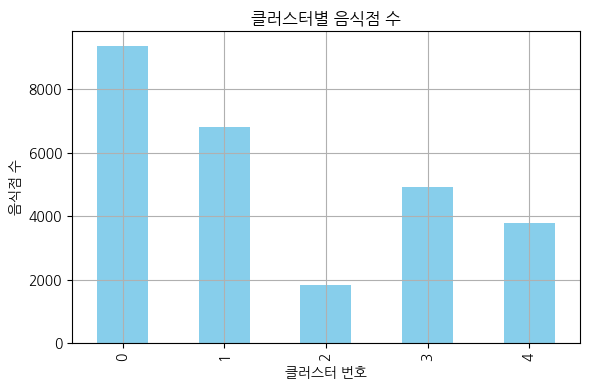

In [18]:
import matplotlib.pyplot as plt

cluster_counts = df["cluster"].value_counts().sort_index()

plt.figure(figsize=(6, 4))
cluster_counts.plot(kind="bar", color="skyblue")
plt.title("클러스터별 음식점 수")
plt.xlabel("클러스터 번호")
plt.ylabel("음식점 수")
plt.grid(True)
plt.tight_layout()
plt.savefig("../outputs/cluster_summary.png")
plt.show()